# Step 1: Importing Libraries and Dataset

In [359]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [360]:
df = pd.read_csv(r'/content/ola.csv')
df

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213
...,...,...,...,...,...,...,...,...,...
10881,2012-03-29 09:00:00,4,4,28.24,67.88,47.74,48,28,76
10882,2012-03-29 10:00:00,3,4,17.13,22.36,15.27,4,1,5
10883,2012-03-29 11:00:00,3,3,19.83,99.17,30.35,38,10,48
10884,2012-03-29 12:00:00,2,4,15.70,77.30,40.16,36,15,51


In [361]:
df.shape

(10886, 9)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.6+ KB


In [363]:
df.isnull().sum()

,0
datetime,0
season,0
weather,0
temp,0
humidity,0
windspeed,0
casual,0
registered,0
count,0


In [364]:
df.duplicated().sum()

np.int64(0)

In [365]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.493937,1.120531,1.0,1.0000,2.00,3.0000,4.00
weather,10886.0,2.491916,1.123139,1.0,1.0000,2.00,4.0000,4.00
temp,10886.0,20.137973,8.696625,5.0,12.6300,20.19,27.7075,35.00
humidity,10886.0,59.946072,22.987200,20.0,40.0400,59.97,79.6200,99.98
windspeed,10886.0,24.960981,14.424684,0.0,12.5225,25.00,37.4275,49.99
casual,10886.0,24.517545,14.390014,0.0,12.0000,25.00,37.0000,49.00
registered,10886.0,99.551442,57.541131,0.0,50.0000,100.00,149.0000,199.00
count,10886.0,124.068988,59.449265,0.0,74.0000,124.00,174.0000,248.00


# Step 2: Feature Engineering

There are times when multiple features are provided in the same feature or we have to derive some features from the existing ones. We will also try to include some extra features in our dataset so, that we can derive some interesting insights from the data we have. Also if the features derived are meaningful then they become a deciding factor in increasing the model's accuracy significantly.

In [366]:
parts =  df['datetime'].str.split(" ", n = 2,expand = True)
df['date'] = parts[0]
df['time'] = parts[1].str[:2].astype(int)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4


In [367]:
# In the above step, we have separated the date and time. Now let's extract the day, month, and year from the date column.

parts = df['date'].str.split('-',n=3, expand = True)
df['day'] = parts[2]
df['month'] = parts[1]
df['year'] = parts[0]
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,01,01,2011
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,01,01,2011
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,01,01,2011
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,01,01,2011
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,01,01,2011


In [368]:
# Whether it is a weekend or a weekday must have some effect on the ride request count.


from datetime import datetime

df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

def weekday_or_weekend(year,month,day):
  try:
    d = datetime(year,month,day)
    if d.weekday() > 4:
      return 0
    else:
      return 1
  except ValueError:
    return np.nan

df['weekday'] = df.apply(lambda x: weekday_or_weekend(x['year'],x['month'],x['day']), axis = 1)

In [369]:
# Bike ride demands are also affected by whether it is am or pm.

def am_or_pm(x):
  if x > 11:
    return 1
  else:
    return 0

df['am_or_pm'] = df.apply(lambda x :am_or_pm(x['time']),axis = 1)
df


,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-03-29 09:00:00,4,4,28.24,67.88,47.74,48,28,76,2012-03-29,9,29,3,2012,1,0
10882,2012-03-29 10:00:00,3,4,17.13,22.36,15.27,4,1,5,2012-03-29,10,29,3,2012,1,0
10883,2012-03-29 11:00:00,3,3,19.83,99.17,30.35,38,10,48,2012-03-29,11,29,3,2012,1,0
10884,2012-03-29 12:00:00,2,4,15.70,77.30,40.16,36,15,51,2012-03-29,12,29,3,2012,1,1


In [370]:
  # It would be nice to have a column which can indicate whether there was any holiday on a particular day or not.

  from datetime import date
  import holidays

  def is_holiday(x):
    indian_holidays = holidays.country_holidays('IN')

    if x in indian_holidays:
      return 1
    else:
      return 0

  df['holiday'] = df['date'].apply(lambda x : is_holiday(x))
  df


,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holiday
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0,0,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0,0,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0,0,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0,0,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-03-29 09:00:00,4,4,28.24,67.88,47.74,48,28,76,2012-03-29,9,29,3,2012,1,0,0
10882,2012-03-29 10:00:00,3,4,17.13,22.36,15.27,4,1,5,2012-03-29,10,29,3,2012,1,0,0
10883,2012-03-29 11:00:00,3,3,19.83,99.17,30.35,38,10,48,2012-03-29,11,29,3,2012,1,0,0
10884,2012-03-29 12:00:00,2,4,15.70,77.30,40.16,36,15,51,2012-03-29,12,29,3,2012,1,1,0


In [371]:
# Now let's remove the columns which are not useful for us.

df.drop(['datetime','date'], axis = 1, inplace = True)

# Step 3: Exploratory Data Analysis

In [372]:
df.isnull().sum()

,0
season,0
weather,0
temp,0
humidity,0
windspeed,0
casual,0
registered,0
count,0
time,0
day,0


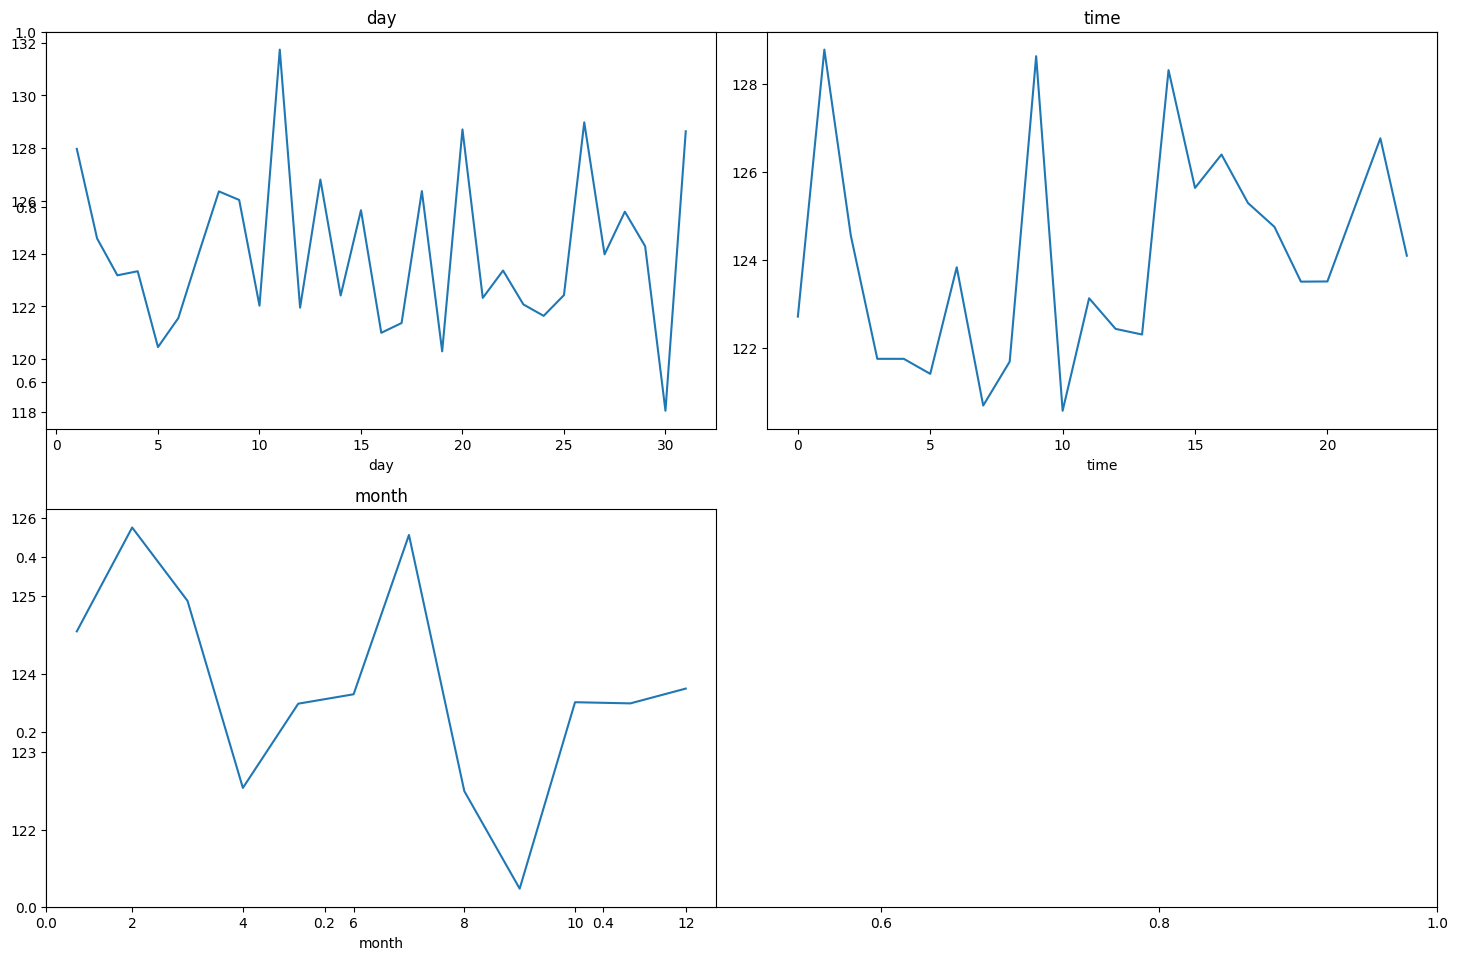

In [373]:
# Now, we will check for any relation between the ride request count with respect to the day, time, or month.

features = ['day','time','month']

plt.subplots(figsize =(15,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  df.groupby(col).mean()['count'].plot()
  plt.title(col)
  plt.xlabel(col)

plt.tight_layout()
plt.show()



season

1. spring
2. summer
3. fall
4. winter

weather

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of ride request raised on the app for that particular hour.

From the above line plots we can confirm some real-life observations:

 * There is no such pattern in the day-wise average of the ride requests.
 * More ride requests in the working hours as compared to the non-working hours.
 * The average ride request count has dropped in the month of festivals that is after the 7th month that is July that is due to more holidays in these months.

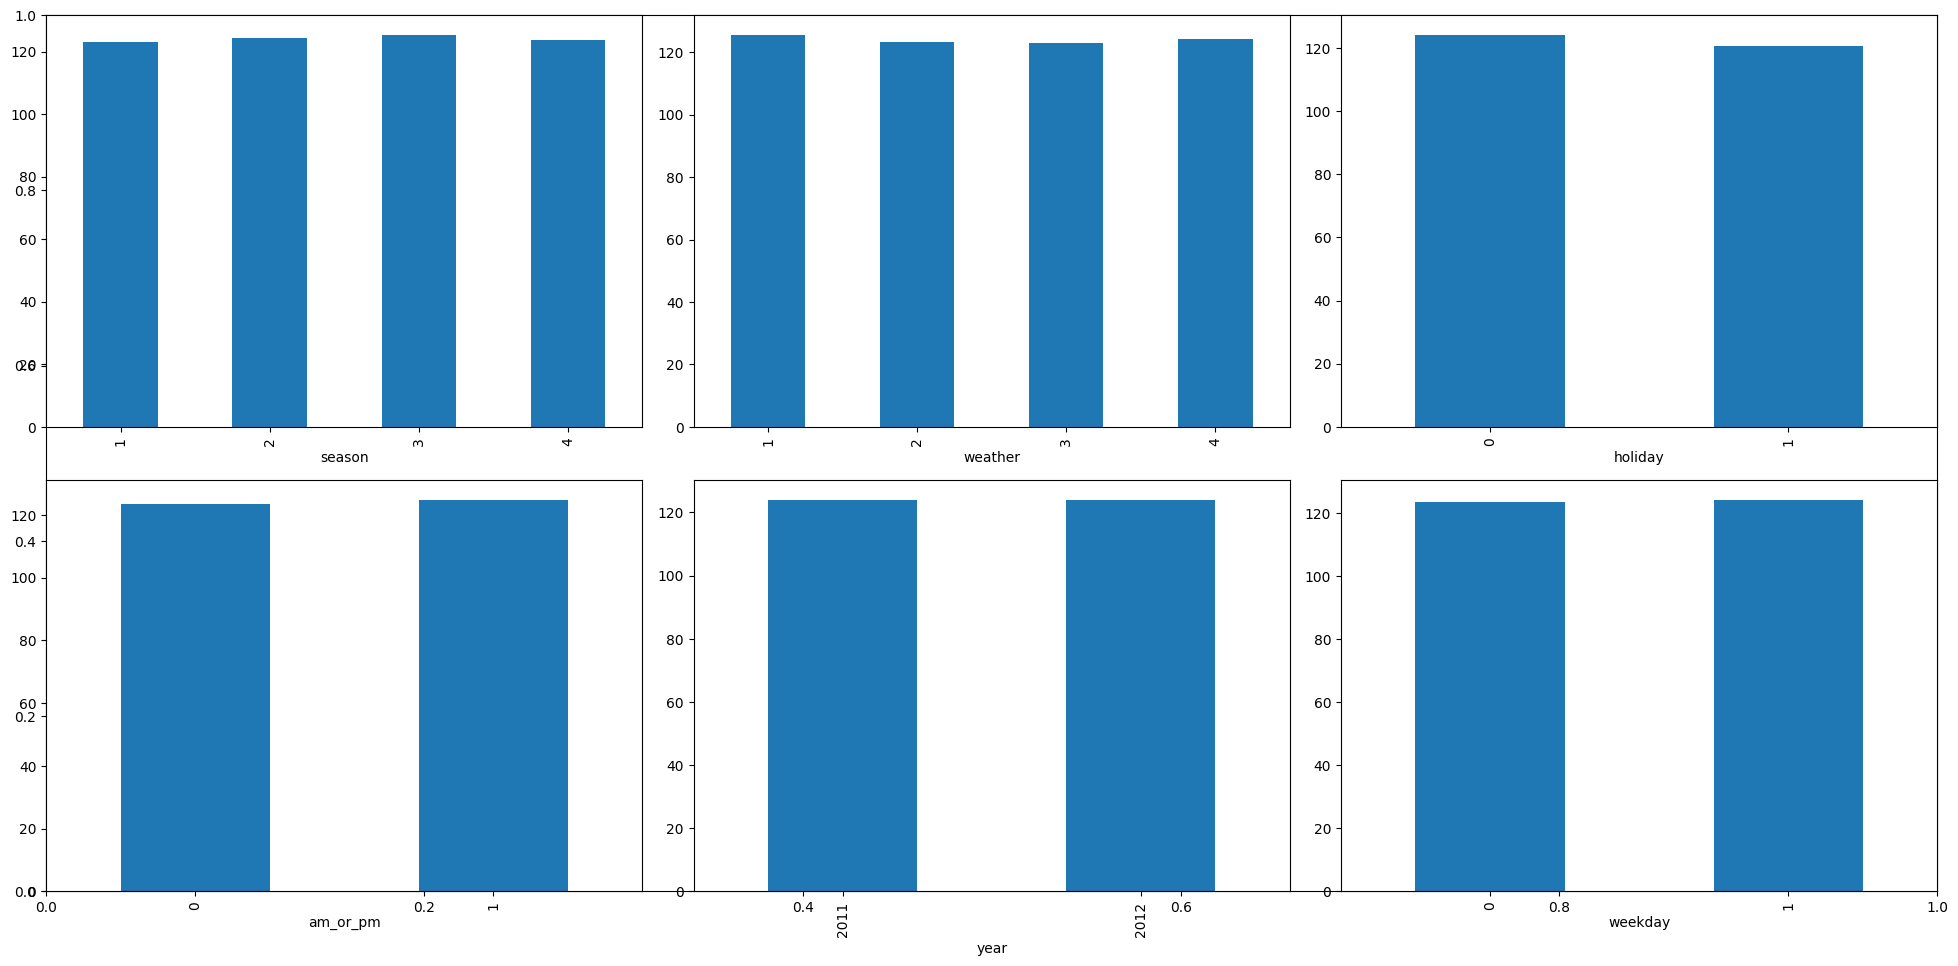

In [374]:
features = ['season', 'weather','holiday','am_or_pm','year','weekday']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  df.groupby(col).mean()['count'].plot.bar()

plt.tight_layout()
plt.show()

From the above bar plots we can confirm some real-life observations:

* Ride request demand is high in the summer as well as season.
* The third category was extreme weather conditions due to this people avoid taking bike rides and like to stay safe at home.
* On holidays no college or offices are open due to this ride request demand is low.
* More ride requests during working hours as compared to non-working hours.
* Bike ride requests have increased significantly from the year 2011 to the year 2012.

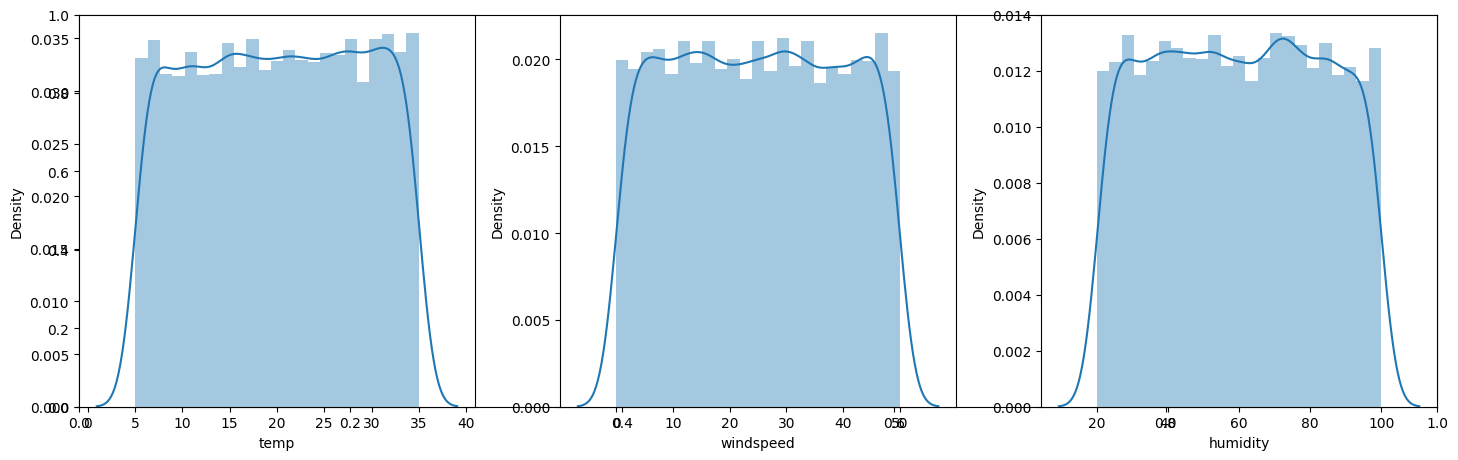

In [375]:
features = ['temp','windspeed','humidity']

plt.subplots(figsize = (15,5))
for i, col in enumerate(features):
  plt.subplot(1,3,i+1)
  sns.distplot(df[col],kde = True)

plt.tight_layout()
plt.show()

Temperature values are normally distributed but due to the high number of 0 entries in the windspeed column, the data distribution shows some irregularities.

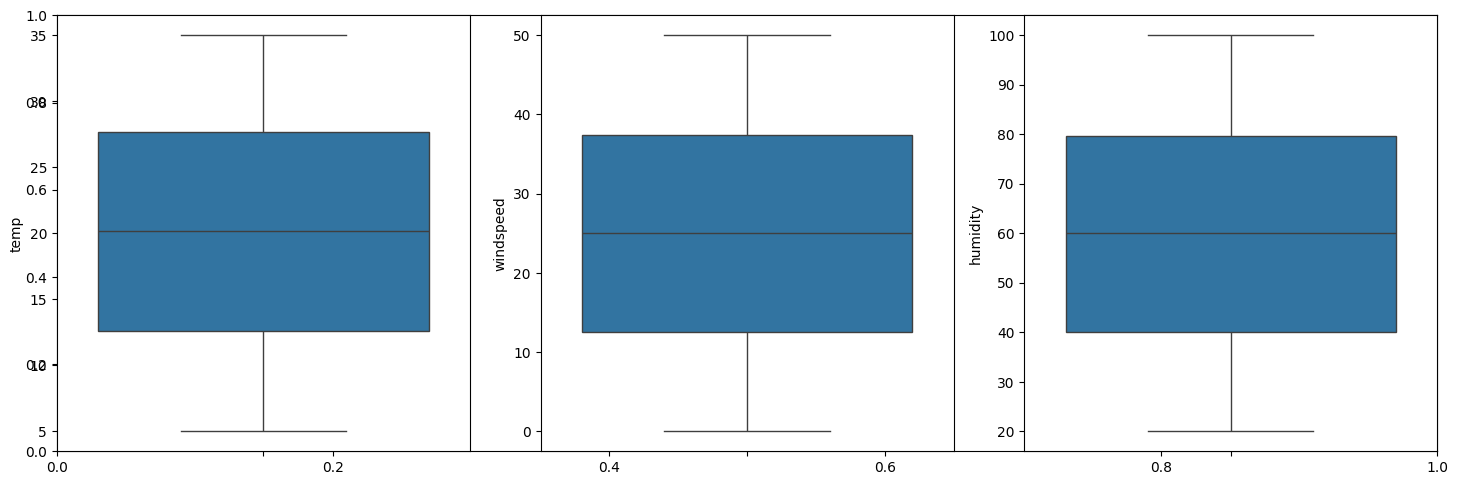

In [376]:
features = ['temp','windspeed','humidity']

plt.subplots(figsize = (15,5))
for i, col in enumerate(features):
  plt.subplot(1,3,i+1)
  sns.boxplot(df[col])

plt.tight_layout()
plt.show()

In [377]:
# Ah! outliers let's check how much data we will lose if we remove outliers.

num_rows = df.shape[0] - df[df['windspeed']<50].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 0.


So looking at above values, we consider we don't have outliers

In [ ]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(df[col])
plt.show()

In [ ]:
# Now let's check whether there are any highly correlated features in our dataset or not.

In [ ]:
sns.heatmap(df.corr()>0.8, annot = True,cbar = False)
plt.show()

Here the registered feature is highly correlated with our target variable which is count. This will lead to a situation of data leakage if we do not handle this situation. So, let's remove this 'registered' column from our feature set and also the 'time' feature.

Now, we have to remove the outliers we found in the above two observations that are for the humidity and wind speed.

In [ ]:
df.drop(['registered','time'], axis = 1)

Step 4: Model Training

Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [ ]:
features = df.drop('count', axis = 1)
target = df['count']

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
# Normalizing the data before feeding it into machine learning models helps us to achieve stable and fast training.

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

We have split our data into training and validation data also the normalization of the data has been done. Now let's train some state-of-the-art machine learning models and select the best out of them using the validation dataset.

In [ ]:
model = [LinearRegression(),Lasso(),Ridge(),RandomForestRegressor()]
from sklearn.metrics import mean_absolute_error as mae

for i in range(len(model)):
  model[i].fit(x_train,y_train)

  print(f'{model[i]} :')

  train_preds = model[i].predict(x_train)
  print('Training Error :', mae(y_train, train_preds))

  test_preds = model[i].predict(x_test)
  print('Testing Error :', mae(y_test, test_preds))
  print()